In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training.csv', 'test (1).csv', 'sample_submission (2).csv']


In [98]:
#lets read the training data
train_data = pd.read_csv('../input/training.csv')
print("The train data")
train_data.head()

The train data


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,1,4,1,5,4,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,2,2,-1,4,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,1,1,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [99]:
#loading the test data
test_data = pd.read_csv('../input/test (1).csv')
print("The test data")
test_data.head()


The test data


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,1,0,0,0,0,0,0,0,0,-1,-1,1,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,0,0,0,0,0,0,1,0,0,-1,1,-1,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [100]:
#information on the train_features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [101]:
#information on the test_features
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 32 columns):
ID           2365 non-null int64
Q1           2365 non-null int64
Q2           2365 non-null int64
Q3           2365 non-null int64
Q4           2365 non-null int64
Q5           2365 non-null int64
Q6           2365 non-null int64
Q7           2365 non-null int64
Q8_1         2365 non-null int64
Q8_2         2365 non-null int64
Q8_3         2365 non-null int64
Q8_4         2365 non-null int64
Q8_5         2365 non-null int64
Q8_6         2365 non-null int64
Q8_7         2365 non-null int64
Q8_8         2365 non-null int64
Q8_9         2365 non-null int64
Q8_10        2365 non-null int64
Q8_11        2365 non-null int64
Q9           2365 non-null int64
Q10          2365 non-null int64
Q11          2365 non-null int64
Q12          2365 non-null int64
Q13          2365 non-null int64
Q14          2365 non-null int64
Q15          2365 non-null int64
Q16          2365 non-null int64
Q1

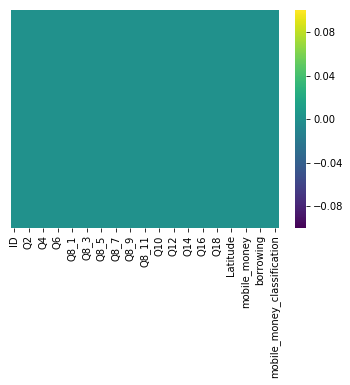

In [102]:
#from the above we can see that train_Data has more columns
# check if the data has missing points with seaborn heatmap
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False, cmap='viridis')

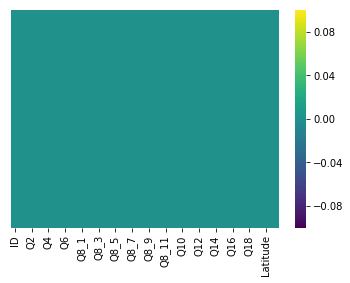

In [103]:

#though unusual we can also look if the test data has some missing values
# check if the data has missing points with seaborn heatmap
import seaborn as sns
sns.heatmap(test_data.isnull(),yticklabels=False, cmap='viridis')

In [104]:
#Checking for missing data
NAs = pd.concat([train_data.isnull().sum()], axis=1)
#keys=[‘train_data’]
NAs[NAs.sum(axis=1) > 0]

,0


In [105]:
# view the columns
# view the columns in train_data and test_data
train_data.columns,test_data.columns

(Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
        'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
        'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
        'insurance', 'mobile_money_classification'],
       dtype='object'),
 Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
        'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
        'Latitude', 'Longitude'],
       dtype='object'))

In [106]:
#lets check how thye submission csv is supposed to look like 
submission= pd.read_csv('../input/sample_submission (2).csv')
submission.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [107]:
#dropping the labels that you are supposed to predict and the excess from train_head
cols = ['ID','mobile_money', 'savings', 'borrowing','insurance']
train_data = train_data.drop(cols, axis=1)
x_test = test_data.drop(['ID'], axis=1)

In [108]:
#lets first train the ANN using all the data without removing outliers
#using the all data
X = train_data.drop(['mobile_money_classification'], axis=1)
y = train_data['mobile_money_classification']

knn has no attribute for feature importrance but there is work around that

In [109]:
from sklearn.preprocessing import MinMaxScaler
names=X.columns
names1=x_test.columns
scaler = MinMaxScaler(feature_range=(0, 1))
X1 = scaler.fit_transform(X)
X2 = pd.DataFrame(X1, columns=names)
X_test=scaler.fit_transform(x_test)
X_test1 = pd.DataFrame(X_test, columns=names1)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [110]:
#looking at the structure of the two data frames
X2.columns,X_test1.columns


(Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
        'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
        'Latitude', 'Longitude'],
       dtype='object'),
 Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
        'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
        'Latitude', 'Longitude'],
       dtype='object'))

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((5320, 31), (5320,), (1774, 31), (1774,))

In [112]:
#training a base knn on the data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

test_pred = knn_classifier.predict_proba(X_test1)

test_pred = pd.DataFrame(knn_classifier.predict_proba(X_test1), columns=labels.classes_)
q = {'ID': test_data["ID"], 'no_financial_services': test_pred[0], 'other_only': test_pred[1],
    'mm_only': test_pred[2], 'mm_plus': test_pred[3]}
df_pred = pd.DataFrame(data=q)
df_pred = df_pred[['ID','no_financial_services', 'other_only', 'mm_only', 'mm_plus'  ]]

In [114]:
df_pred.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.0,0.0,0.0,1.0
1,8208,0.0,0.2,0.2,0.6
2,2785,0.0,0.0,0.0,1.0
3,2967,0.2,0.8,0.0,0.0
4,1697,0.0,0.0,0.2,0.8


In [115]:
#df_pred.to_csv('pred_set.csv', index=False) #save to csv file#

In [116]:
#now lets try tuning the knn parameters
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X2, y, cv=10, scoring='accuracy')
print(scores)

[0.62587904 0.61322082 0.62165963 0.63150492 0.58591549 0.62394366
 0.61158192 0.5960452  0.58415842 0.61244696]


In [118]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.6106356064711891


In [119]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X2, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.5676261838945986, 0.5263240037427819, 0.5880808156092414, 0.5817399872498256, 0.6106356064711891, 0.6049874568528348, 0.6227564867449021, 0.6175445996510429, 0.6241794537631579, 0.6223530408572071, 0.6336188955433112, 0.6279804996144223, 0.630384224962677, 0.6293875552217516, 0.6329166561708203, 0.6308095402049132, 0.6346040237094824, 0.6361559115076064, 0.6382648136895355, 0.6406623779682956, 0.6447512733416361, 0.6427776460671057, 0.6412261493976052, 0.6426358004381805, 0.640796251082732, 0.6402336631783718, 0.639534598342, 0.6437633499928659, 0.6410884738127582, 0.6426437443519186]


Text(0, 0.5, 'Cross-Validated Accuracy')

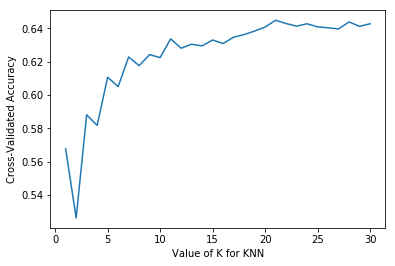

In [120]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

looking at the above depictio we can see that the k_neighbor is best at 20 and doesnt change the performance

In [121]:
#using the best n_neighbors
#training a base knn on the data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier1 = KNeighborsClassifier(n_neighbors=20)
knn_classifier1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [122]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

test_pred = knn_classifier1.predict_proba(X_test1)

test_pred = pd.DataFrame(knn_classifier1.predict_proba(X_test1), columns=labels.classes_)
q = {'ID': test_data["ID"], 'no_financial_services': test_pred[0], 'other_only': test_pred[1],
    'mm_only': test_pred[2], 'mm_plus': test_pred[3]}
df_pred1 = pd.DataFrame(data=q)
df_pred1 = df_pred1[['ID','no_financial_services', 'other_only', 'mm_only', 'mm_plus'  ]]


In [123]:
df_pred1.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.0,0.00,0.20,0.80
1,8208,0.0,0.05,0.25,0.70
2,2785,0.0,0.00,0.05,0.95
3,2967,0.2,0.70,0.00,0.10
4,1697,0.0,0.00,0.10,0.90


In [ ]:
df_pred1.to_csv('pred_set.csv', index=False) #save to csv file#